K-MEans

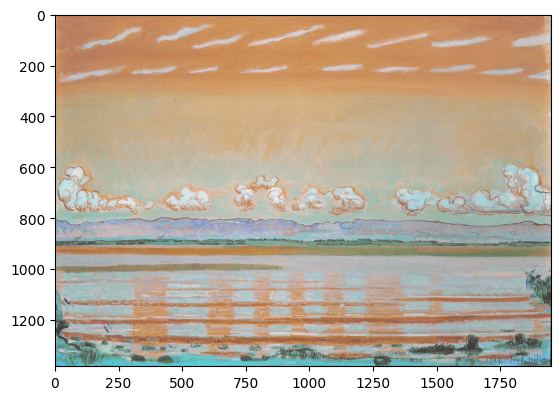

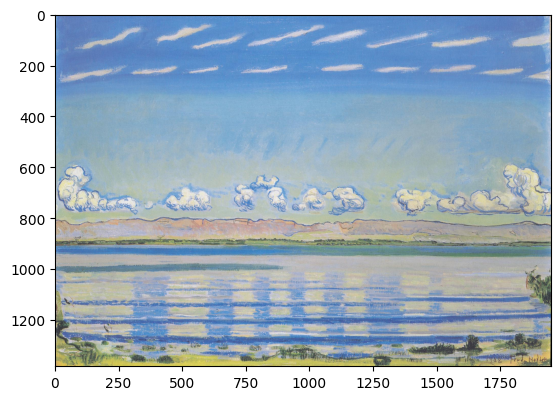

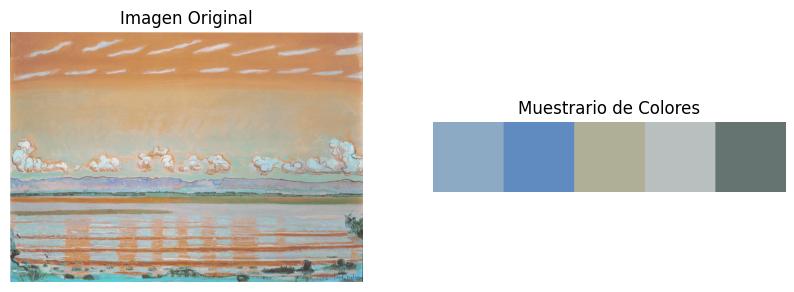

In [102]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def extract_colors(image_path, num_colors):
    # Leer la imagen
    image = cv2.imread(image_path)
    plt.imshow(image)
    plt.show()
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    resized_image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
    # Redimensionar la imagen para que sea más fácil de manejar
    pixels = resized_image.reshape(-1, 3)
    # Aplicar K-Means para encontrar los colores dominantes
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)

    # Extraer los colores dominantes (centroids)
    colors = kmeans.cluster_centers_.astype(int)

    # Crear un muestrario de colores
    color_palette = np.zeros((50, 50 * num_colors, 3), dtype = np.uint8)
    for i, color in enumerate(colors):
        color_palette[:, i*50:(i+1)*50] = color

    return colors, color_palette

# Ruta de la imagen de entrada
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/art_nouveau_modern_ferdinand-hodler_rhythmic-landscape-on-lake-geneva-1908.jpg'

# Número de colores a extraer
num_colors = 5

# Extraer colores y generar muestrario
colors, color_palette = extract_colors(image_path, num_colors)

# Mostrar la imagen original y el muestrario de colores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(color_palette)
plt.title('Muestrario de Colores')
plt.axis('off')

plt.show()

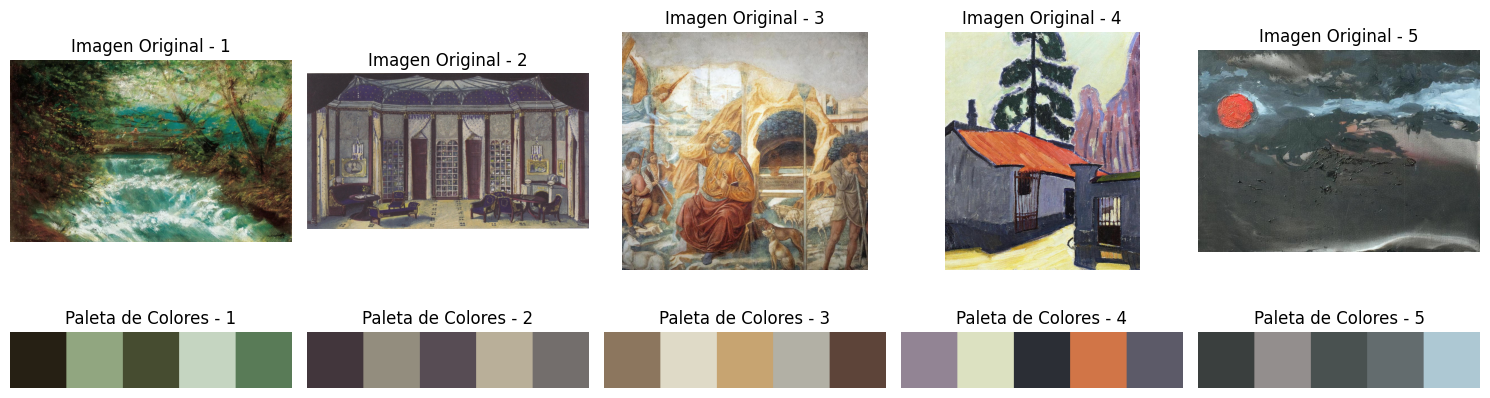

In [53]:
import os

# Directorio que contiene las imágenes
directory = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample'

# Número de imágenes a procesar
num_images = 5

# Número de colores a extraer
num_colors = 5

# Lista para almacenar los colores extraídos y las paletas de colores correspondientes
all_colors = []
all_palettes = []
all_original_images = []

# Contador para controlar el número de imágenes procesadas
processed_images = 0

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Ruta completa de la imagen
        image_path = os.path.join(directory, filename)
        
        # Extraer colores y generar muestrario
        colors, color_palette = extract_colors(image_path, num_colors)
        
        # Guardar los colores y la paleta de colores
        all_colors.append(colors)
        all_palettes.append(color_palette)
        
        # Guardar la imagen original
        original_image = cv2.imread(image_path)
        all_original_images.append(original_image)
        
        # Incrementar el contador de imágenes procesadas
        processed_images += 1
        
        # Verificar si se han procesado suficientes imágenes
        if processed_images >= num_images:
            break

# Mostrar las imágenes originales y las paletas de colores correspondientes
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, num_images, i+1)
    plt.imshow(cv2.cvtColor(all_original_images[i], cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original - {}'.format(i+1))
    plt.axis('off')
    
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(all_palettes[i])
    plt.title('Paleta de Colores - {}'.format(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad antes de calcular el coeficiente de silueta
def silhouette_analysis_pca(data, max_clusters=10, n_components=50):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data_pca)
        silhouette_avg = silhouette_score(data_pca, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    # Plotting silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis (with PCA)')
    plt.show()

# Calcular el coeficiente de silueta con reducción de dimensionalidad
silhouette_analysis_pca(img_list[0])


In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Lista para almacenar las puntuaciones de la silueta
silhouette_scores = []

# Valores de k a probar
k_values = range(2, 10)
all_colors_combined = np.concatenate([np.reshape(matrix, (-1, 3)) for matrix in all_colors])
# Iterar sobre diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    print(all_colors)
    kmeans.fit(all_colors[0])
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(all_colors[0], labels)
    silhouette_scores.append(silhouette_avg)

# Plot del método de la silueta
plt.plot(k_values, silhouette_scores)
plt.title('Método de la silueta')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntuación de la silueta')
plt.show()

# Método del codo
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(all_colors[0])
    distortions.append(kmeans.inertia_)

# Plot del método del codo
plt.plot(k_values, distortions, 'bx-')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.show()


[array([[ 38,  32,  20],
       [145, 166, 128],
       [ 70,  76,  48],
       [197, 213, 193],
       [ 89, 123,  87]]), array([[ 66,  54,  60],
       [147, 141, 126],
       [ 87,  76,  84],
       [185, 175, 153],
       [115, 110, 108]]), array([[140, 118,  94],
       [223, 218, 199],
       [199, 164, 113],
       [178, 176, 165],
       [ 93,  68,  57]]), array([[146, 132, 148],
       [220, 225, 193],
       [ 43,  46,  53],
       [209, 117,  71],
       [ 92,  90, 104]]), array([[ 58,  63,  62],
       [147, 142, 141],
       [ 73,  81,  80],
       [ 99, 108, 110],
       [173, 200, 211]])]
[array([[ 38,  32,  20],
       [145, 166, 128],
       [ 70,  76,  48],
       [197, 213, 193],
       [ 89, 123,  87]]), array([[ 66,  54,  60],
       [147, 141, 126],
       [ 87,  76,  84],
       [185, 175, 153],
       [115, 110, 108]]), array([[140, 118,  94],
       [223, 218, 199],
       [199, 164, 113],
       [178, 176, 165],
       [ 93,  68,  57]]), array([[146, 132, 148]

ValueError: Number of labels is 5. Valid values are 2 to n_samples - 1 (inclusive)

DBSCAN

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def extract_colors_dbscan(image_path, eps, min_samples):
    # Leer la imagen
    image = cv2.imread(image_path)

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Redimensionar la imagen para que sea más fácil de manejar
    pixels = image.reshape(-1, 3)

    # Normalizar los valores de los píxeles
    pixels = pixels / 255.0

    # Aplicar DBSCAN para encontrar los colores dominantes
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(pixels)

    # Extraer etiquetas de cluster asignadas a cada píxel
    labels = dbscan.labels_

    # Eliminar puntos clasificados como ruido (-1)
    unique_labels = np.unique(labels)
    unique_labels = [x for x in unique_labels if x != -1]

    # Extraer los colores dominantes
    colors = []
    for label in unique_labels:
        cluster_pixels = pixels[labels == label]
        cluster_color = np.mean(cluster_pixels, axis=0)
        colors.append(cluster_color)

    # Crear un muestrario de colores
    color_palette = np.zeros((50, 50 * len(colors), 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        color_palette[:, i*50:(i+1)*50] = color * 255.0

    return colors, color_palette

# Ruta de la imagen de entrada
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/abstract_expressionism_elaine-de-kooning_spring-1965.jpg'

# Parámetros DBSCAN
eps = 0.1  # Radio de la vecindad
min_samples = 5  # Número mínimo de muestras en una vecindad para ser considerado un núcleo

# Extraer colores y generar muestrario
colors, color_palette = extract_colors_dbscan(image_path, eps, min_samples)

# Mostrar la imagen original y el muestrario de colores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(color_palette)
plt.title('Muestrario de Colores')
plt.axis('off')

plt.show()


Mean Shift

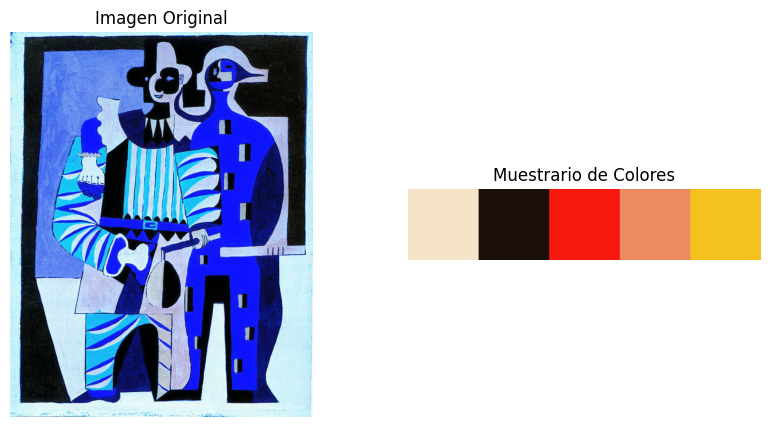

In [67]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

def extract_colors_mean_shift_density(image_path, bandwidth=None):
    # Leer la imagen
    image = cv2.imread(image_path)

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Redimensionar la imagen para que sea más fácil de manejar
    pixels = image.reshape(-1, 3)

    # Estimar el ancho de banda si no se proporciona
    if bandwidth is None:
        bandwidth = estimate_bandwidth(pixels, quantile=0.2, n_samples=500)

    # Aplicar el algoritmo Mean Shift para encontrar los colores dominantes
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(pixels)

    # Extraer los colores únicos (centros de los clústeres)
    unique_colors = meanshift.cluster_centers_.astype(np.uint8)

    # Crear un muestrario de colores
    color_palette = np.zeros((50, 50 * len(unique_colors), 3), dtype=np.uint8)
    for i, color in enumerate(unique_colors):
        color_palette[:, i*50:(i+1)*50] = color

    return unique_colors, color_palette

# Ruta de la imagen de entrada
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/art_nouveau_modern_pablo-picasso_pierrot-and-harlequin-1920.jpg'

# Extraer colores y generar muestrario
colors, color_palette = extract_colors_mean_shift_density(image_path)

# Mostrar la imagen original y el muestrario de colores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(color_palette)
plt.title('Muestrario de Colores')
plt.axis('off')

plt.show()


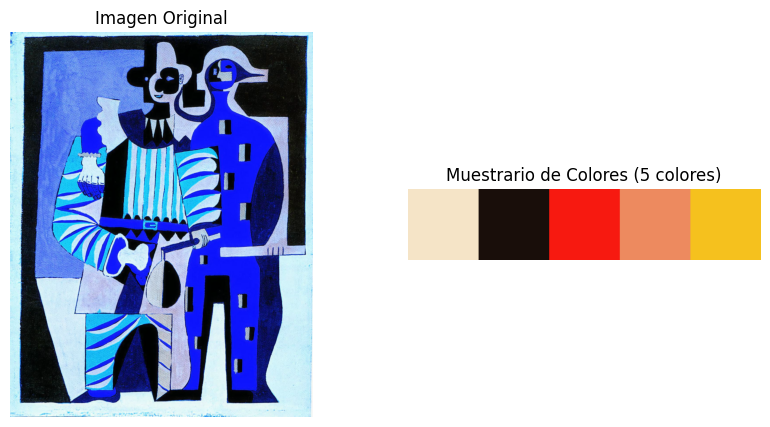

In [68]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

def extract_colors_mean_shift_density(image_path, num_colors):
    # Leer la imagen
    image = cv2.imread(image_path)

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Redimensionar la imagen para que sea más fácil de manejar
    pixels = image.reshape(-1, 3)

    # Estimar el ancho de banda
    bandwidth = estimate_bandwidth(pixels, quantile=0.2, n_samples=500)

    # Aplicar el algoritmo Mean Shift para encontrar los colores dominantes
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(pixels)

    # Extraer los colores únicos (centros de los clústeres)
    unique_colors = meanshift.cluster_centers_.astype(np.uint8)

    # Limitar el número de colores extraídos
    if len(unique_colors) > num_colors:
        unique_colors = unique_colors[:num_colors]

    # Crear un muestrario de colores
    color_palette = np.zeros((50, 50 * len(unique_colors), 3), dtype=np.uint8)
    for i, color in enumerate(unique_colors):
        color_palette[:, i*50:(i+1)*50] = color

    return unique_colors, color_palette

# Ruta de la imagen de entrada
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/art_nouveau_modern_pablo-picasso_pierrot-and-harlequin-1920.jpg'

# Número de colores a extraer (entre 5 y 7 en tu caso)
num_colors = np.random.randint(5, 8)

# Extraer colores y generar muestrario
colors, color_palette = extract_colors_mean_shift_density(image_path, num_colors)

# Mostrar la imagen original y el muestrario de colores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(color_palette)
plt.title('Muestrario de Colores ({} colores)'.format(len(colors)))
plt.axis('off')

plt.show()


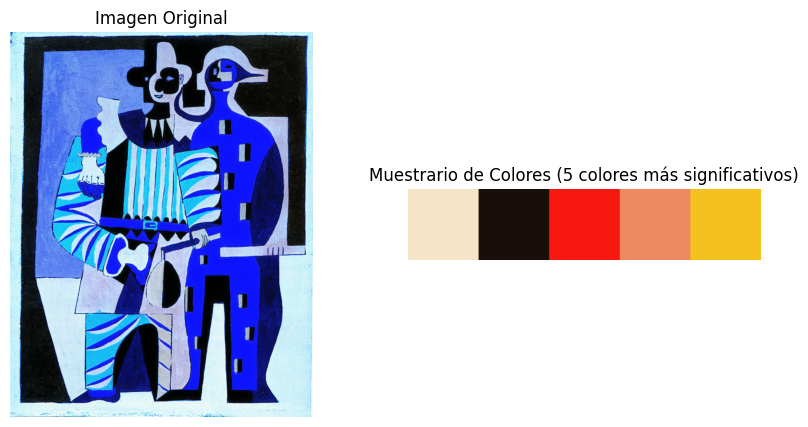

In [69]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

def extract_colors_mean_shift_density(image_path, num_colors):
    # Leer la imagen
    image = cv2.imread(image_path)

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Redimensionar la imagen para que sea más fácil de manejar
    pixels = image.reshape(-1, 3)

    # Estimar el ancho de banda
    bandwidth = estimate_bandwidth(pixels, quantile=0.2, n_samples=500)

    # Aplicar el algoritmo Mean Shift para encontrar los colores dominantes
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(pixels)

    # Extraer los colores únicos (centros de los clústeres)
    unique_colors = meanshift.cluster_centers_.astype(np.uint8)

    # Calcular la cantidad de píxeles para cada color único
    labels = meanshift.labels_
    counts = np.bincount(labels)

    # Ordenar los colores por la cantidad de píxeles que representan
    sorted_indices = np.argsort(counts)[::-1]
    unique_colors = unique_colors[sorted_indices]

    # Limitar el número de colores extraídos
    if len(unique_colors) > num_colors:
        unique_colors = unique_colors[:num_colors]

    # Crear un muestrario de colores
    color_palette = np.zeros((50, 50 * len(unique_colors), 3), dtype=np.uint8)
    for i, color in enumerate(unique_colors):
        color_palette[:, i*50:(i+1)*50] = color

    return unique_colors, color_palette

# Ruta de la imagen de entrada
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/art_nouveau_modern_pablo-picasso_pierrot-and-harlequin-1920.jpg'

# Número de colores a extraer (entre 5 y 7 en tu caso)
num_colors = np.random.randint(5, 8)

# Extraer colores y generar muestrario
colors, color_palette = extract_colors_mean_shift_density(image_path, num_colors)

# Mostrar la imagen original y el muestrario de colores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(color_palette)
plt.title('Muestrario de Colores ({} colores más significativos)'.format(len(colors)))
plt.axis('off')

plt.show()


Fuzzy K-Means

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import skfuzzy as fuzz

def extract_colors_fuzzy_c_means(image_path, num_clusters):
    # Leer la imagen
    image = io.imread(image_path)

    # Convertir la imagen a una matriz 1D
    pixels = image.reshape(-1, 3)

    # Normalizar los valores de los píxeles
    pixels = pixels / 255.0

    # Aplicar Fuzzy C-Means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pixels.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

    # Obtener los colores dominantes
    dominant_colors = cntr.T * 255.0

    # Redondear los valores de color a enteros
    dominant_colors = np.round(dominant_colors).astype(int)

    # Crear un muestrario de colores
    color_palette = np.zeros((50, 50 * num_clusters, 3), dtype=np.uint8)
    for i, color in enumerate(dominant_colors):
        color_palette[:, i*50:(i+1)*50] = color

    return dominant_colors, color_palette

# Ruta de la imagen de entrada
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/abstract_expressionism_joan-mitchell_girolata-1964.jpg'

# Número de colores a extraer
num_clusters = 5

# Extraer colores y generar muestrario
colors, color_palette = extract_colors_fuzzy_c_means(image_path, num_clusters)

# Mostrar la imagen original y el muestrario de colores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_path))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(color_palette)
plt.title('Muestrario de Colores')
plt.axis('off')

plt.show()


ValueError: could not broadcast input array from shape (5,) into shape (50,50,3)

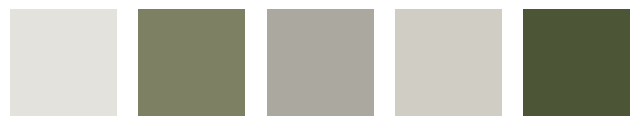

ValueError: 'c' argument has 3533774 elements, which is inconsistent with 'x' and 'y' with size 1000.

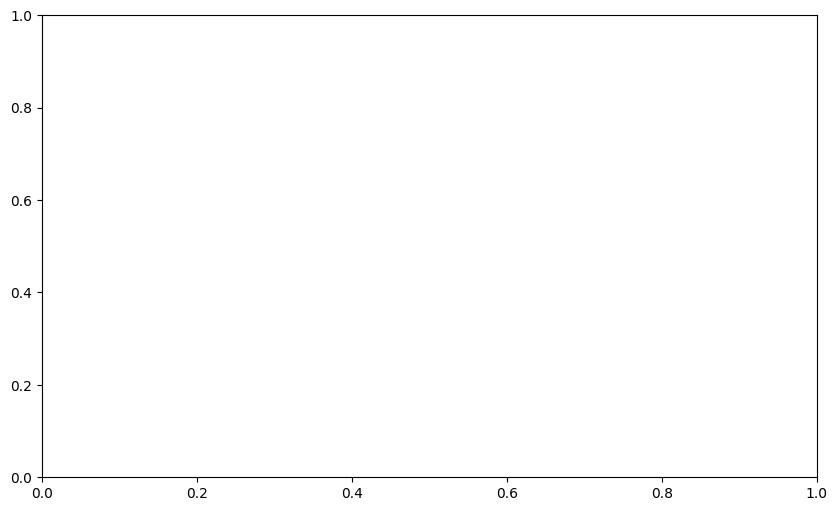

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io
from sklearn.decomposition import PCA

def extract_colors(image_path, n_colors=5):
    # Cargar la imagen
    image = io.imread(image_path)

    # Convertir la imagen a una matriz numpy
    image = np.array(image, dtype=np.float64) / 255

    # Obtener las dimensiones de la imagen
    w, h, d = original_shape = tuple(image.shape)

    # Aplanar la imagen
    image_array = np.reshape(image, (w * h, d))

    # Muestreo aleatorio de la imagen
    image_array_sample = shuffle(image_array, random_state=0)[:1000]

    # Aplicar K-Means para agrupar los colores
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)

    # Centros de los grupos
    centers = kmeans.cluster_centers_

    return centers, labels, image_array_sample

def plot_colors(colors):
    plt.figure(figsize=(8, 6))
    for i in range(len(colors)):
        color_swatch = np.zeros((100, 100, 3))
        color_swatch[:, :, :] = colors[i]
        plt.subplot(1, len(colors), i + 1)
        plt.imshow(color_swatch)
        plt.axis('off')
    plt.show()

def plot_color_distribution(image, labels, centers):
    pca = PCA(n_components=2)
    projected = pca.fit_transform(image)

    plt.figure(figsize=(10, 6))
    plt.scatter(projected[:, 0], projected[:, 1], c=labels, s=10, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
    plt.title('Distribución de colores en el espacio de dos dimensiones')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.colorbar()
    plt.show()

# Ruta de la imagen
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/abstract_expressionism_joan-mitchell_girolata-1964.jpg'

# Extraer los colores presentes en la imagen
centers, labels, image_array_sample = extract_colors(image_path)

# Mostrar los colores identificados
plot_colors(centers)

# Mostrar la distribución de colores en un espacio de dos dimensiones
plot_color_distribution(image_array_sample, labels, centers)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Cargar el conjunto de datos (ejemplo con el conjunto de datos de dígitos de sklearn)
digits = load_digits()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Construir el pipeline de transformaciones
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de características
    ('pca', PCA(n_components=0.95)),  # Reducción de dimensionalidad con PCA
    ('classifier', LogisticRegression(max_iter=1000))  # Clasificador (ejemplo: Regresión Logística)
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.9611111111111111


In [2]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def extract_colors(image_path, num_colors):
    # Cargar la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir la imagen a RGB
    
    # Redimensionar la imagen para facilitar el procesamiento (opcional)
    resized_image = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
    # Obtener los valores de píxel de la imagen
    pixel_values = resized_image.reshape((-1, 3))
    
    # Aplicar K-Means para agrupar los colores
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixel_values)
    
    # Obtener los colores centrales de los clusters
    colors = kmeans.cluster_centers_
    
    # Convertir los colores a enteros
    colors = colors.astype(int)
    
    return colors

def show_colors(colors):
    # Crear una imagen en blanco para mostrar los colores
    color_display = np.zeros((100, len(colors)*100, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        color_display[:, i*100:(i+1)*100] = color
    # Mostrar la imagen con los colores
    cv2.imshow("Color Palette", cv2.cvtColor(color_display, cv2.COLOR_RGB2BGR))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Ruta de la imagen
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/early_renaissance_andrea-del-verrocchio_the-baptism-of-christ.jpg'

# Número de colores a extraer
num_colors = 5

# Extraer los colores de la imagen
colors = extract_colors(image_path, num_colors)

# Mostrar los colores extraídos
show_colors(colors)

****************************************0************************************


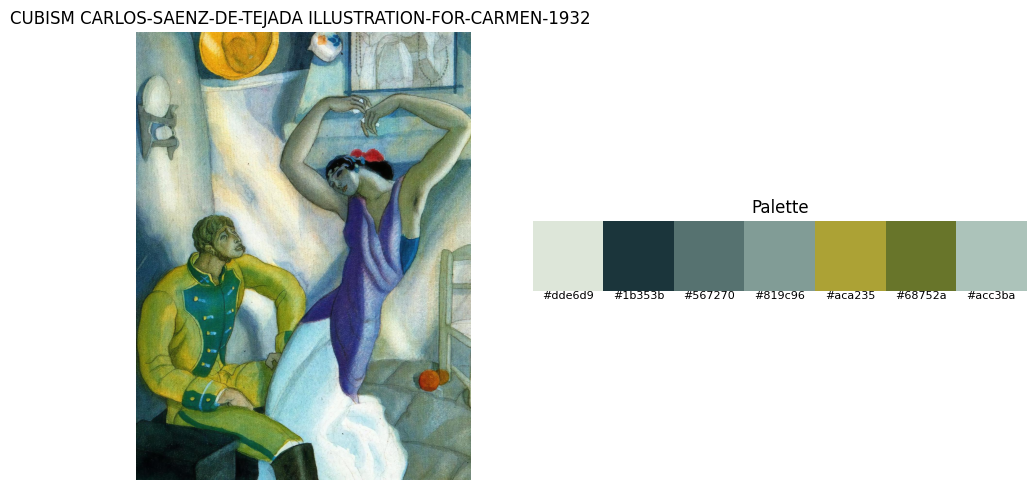

>> (7400, 2)


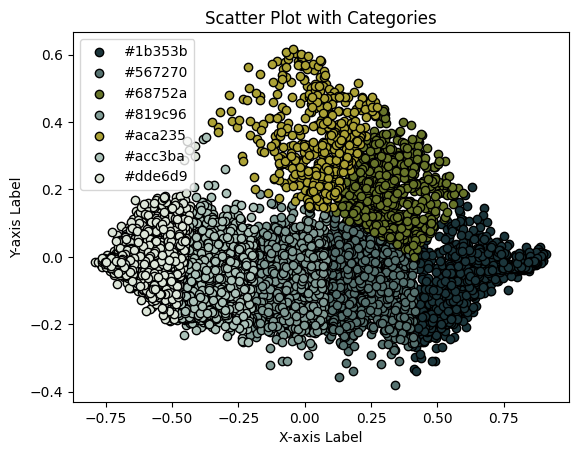

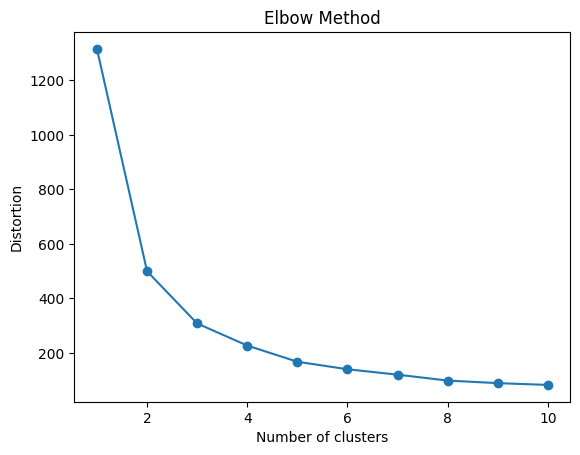

K  Coeficiente
0   2     0.509963
1   3     0.451222
2   4     0.463394
3   5     0.431977
4   6     0.396846
5   7     0.389737
6   8     0.402261
7   9     0.372412
8  10     0.373295

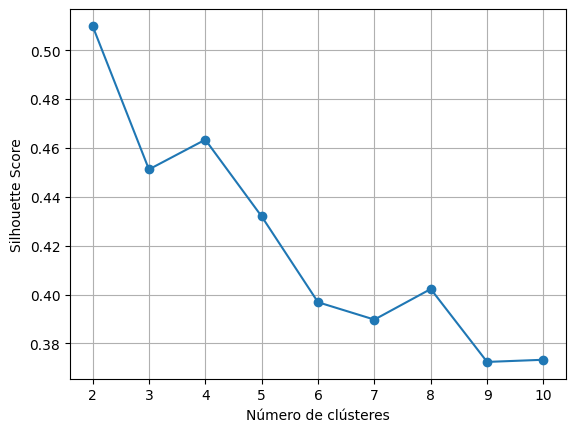

****************************************1************************************


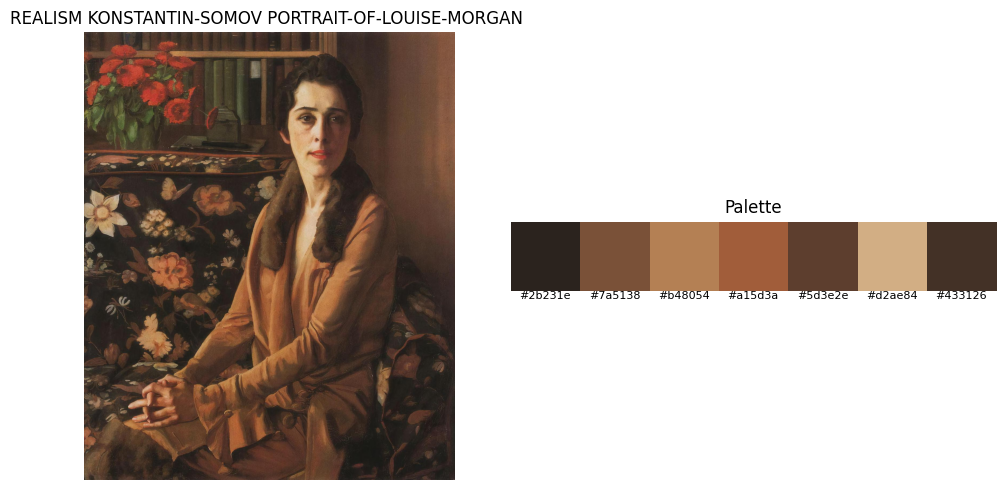

>> (8200, 2)


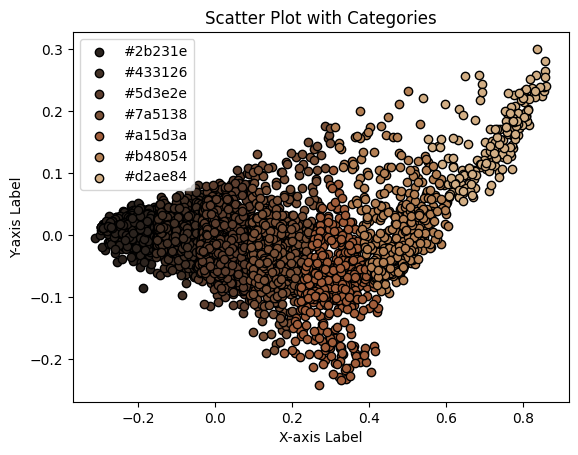

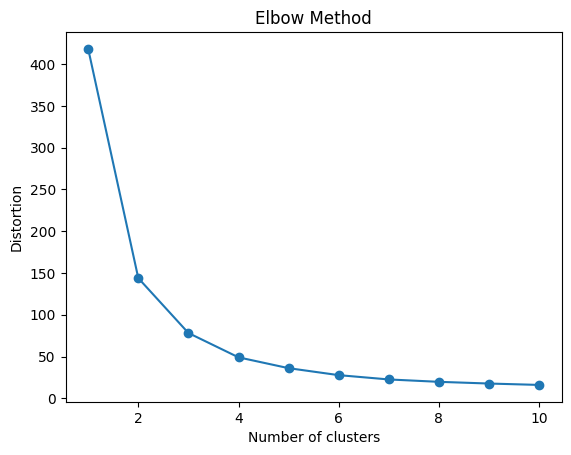

K  Coeficiente
0   2     0.636259
1   3     0.539325
2   4     0.528051
3   5     0.504723
4   6     0.474656
5   7     0.460157
6   8     0.432597
7   9     0.405001
8  10     0.406340

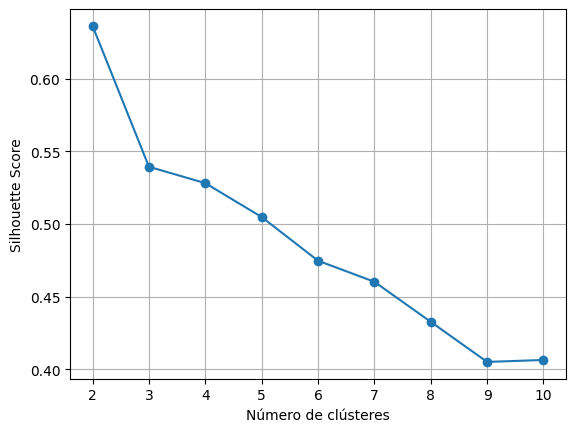

In [104]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import re
import pandas as pd
import random
import webcolors

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples

from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Función para cargar imágenes desde un directorio dado
def load_images(root_path):
    files = os.listdir(root_path)
    random.shuffle(files)
    images_original = []
    for file in files:
        img = cv2.imread(os.path.join(root_path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images_original.append({'image': img, 'name': file})
    return images_original

# Función para preprocesar las imágenes (escalar, normalizar, cambiar tamaño)
def pre_process_image(images_original, flatten=False, normalize=False, target_size=None):
    images_process = []
    for data in images_original:
        height, width = data['image'].shape[:2]
        if target_size is not None:
            ratio = float(target_size) / max(height, width)
            new_height = int(height * ratio)
            new_width = int(width * ratio)
            image = cv2.resize(data['image'], (new_width,new_height))

        if flatten:
            image = image.reshape((-1, 3))
        if normalize:
            image = image / 255.0
        images_process.append(image)
    return images_process


# Función para aplicar el algoritmo de K-means a una imagen
def kmeans_image(img,num_clusters):
    kmeans = KMeans(n_clusters=num_clusters,random_state=42)
    kmeans.fit(img)
    return kmeans.cluster_centers_, kmeans.labels_

# Función para convertir un color RGB a su código hexadecimal
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

# Función para aplicar PCA o t-SNE a una imagen y visualizarla
def dimensionality_reduction(img, colors, tsne=False,p=3):
    if not tsne:
        pca = PCA(n_components=2)
        x_train_reduced = pca.fit_transform(img)
    else:
        tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=1)
        x_train_reduced = tsne.fit_transform(img)
    print('>>',x_train_reduced.shape)

    colors = colors * 255
    colors = list(map(rgb_to_hex,colors))
    # colors
    color_dict = {}
    for i in colors:
        color_dict[i] = i
    color_dict
    colors = np.array(colors)

    for category in np.unique(colors):
        mask = colors == category
        # print(mask)
        plt.scatter(x_train_reduced[:,0][mask], x_train_reduced[:,1][mask], label=category, color=color_dict[category],edgecolors='black')

    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.title('Scatter Plot with Categories')
    plt.legend()  # Show legend

    # Show plot
    plt.show()
    return x_train_reduced

def rgb_to_color_hex(rgb_tuple):
    try:
        color_name = webcolors.rgb_to_hex(rgb_tuple)
    except ValueError:
        color_name = 'Unknown'
    return color_name

# Función para visualizar la paleta de colores de una imagen junto con sus colores predominantes
def draw_image_palette(image_original, centroids=None):
    #for data in images_original:
    palette = centroids * 255
    title = image_original['name'][:-3]
    title = re.sub(r'[^A-Za-z0-9\-]+', ' ', title).upper()
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"{title}")
    plt.imshow(image_original['image'])
    plt.axis('off')
    
    if centroids is not None:
        plt.subplot(1, 2, 2)
        plt.title('Palette')
        palette_colors = []
        color_names = []
        for color in palette:
            palette_colors.append(color)
            color_name = rgb_to_color_hex(tuple(color.astype(int)))
            color_names.append(color_name)
        plt.imshow(np.expand_dims(palette_colors, axis=0).astype(np.uint8))
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        for i, name in enumerate(color_names):
            plt.text(i, .5, name, ha='center', va='top', color='black', fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Función para visualizar una serie de colores
def plot_colors(colors):
    plt.figure(figsize=(8, 6))
    for i in range(len(colors)):
        color_swatch = np.zeros((100, 100, 3))
        color_swatch[:, :, :] = colors[i]
        plt.subplot(1, len(colors), i + 1)
        plt.imshow(color_swatch)
        plt.axis('off')
    plt.show()

# Función para el método del codo
def elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    # Plotting the elbow method graph
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Función para el análisis de silueta
def silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    # Plotting silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()


# Función para graficar el coeficiente de silueta para diferentes números de clusters
def silhouette_plot(data, max_clusters=10):
    scores = []
    for i in range(2, max_clusters + 1):
        model_k = KMeans(n_clusters=i, n_init=10, random_state=42)
        # Entrenamos el modelo
        model_k.fit(data)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(data, model_k.labels_)
        scores.append(score)
    # Mostramos los valores de los coeficientes
    display(pd.DataFrame({'K': range(2, max_clusters+1), 'Coeficiente': scores}))
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(2, max_clusters+1), scores, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

root_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample'
images_original = load_images(root_path)
images_process = pre_process_image(images_original, flatten=True, normalize=True, target_size=100)

num_clusters = 7
num_images = 2
processed_images = 0

for i, image in enumerate(images_process):
    print(f"****************************************{i}************************************")
    centroids,labels = kmeans_image(images_process[i],num_clusters)
    draw_image_palette(images_original[i], centroids)
    # plot_colors(centroids)
    x_train_reduced = dimensionality_reduction(images_process[i],centroids[labels])

    elbow_method(x_train_reduced)
    silhouette_plot(x_train_reduced)
    processed_images += 1
    if processed_images >= num_images:
        break

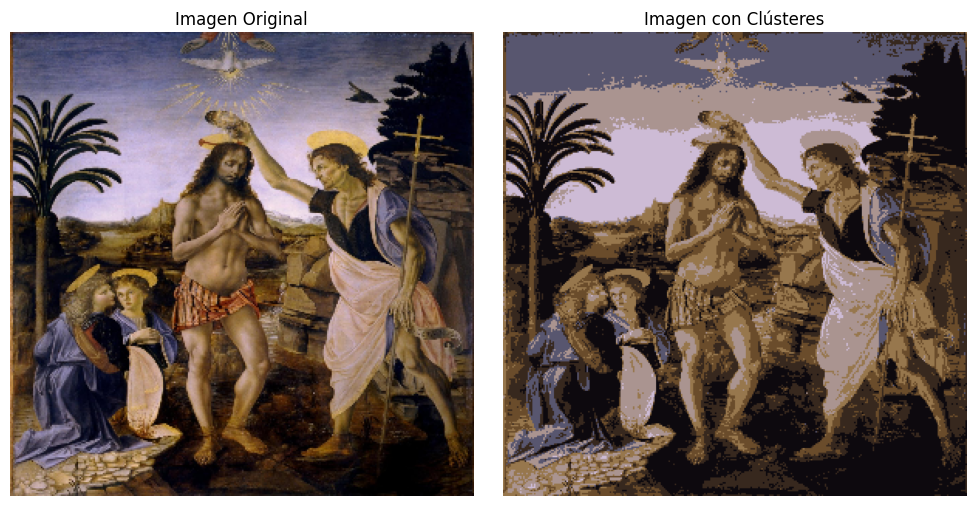

Silhouette Score: 0.4457294245527769


In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(image_path, target_size=None):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if target_size is not None:
        img = cv2.resize(img, target_size)
    return img

# Función para convertir la imagen en un formato adecuado para el clustering
def image_to_data(image):
    return image.reshape(-1, 3)

# Función para realizar clustering y evaluar el rendimiento
def perform_clustering(image_data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(image_data)
    silhouette_avg = silhouette_score(image_data, labels)
    return kmeans.cluster_centers_, labels, silhouette_avg

# Función para visualizar la imagen original y los clústeres
def visualize_clusters(image, cluster_centers, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    clustered_image = cluster_centers[labels].reshape(image.shape)
    plt.imshow(clustered_image.astype(np.uint8))
    plt.title('Imagen con Clústeres')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Ruta de la imagen
image_path = '/home/satoru/repos/u_andes/maia/mlns/micro_projects/one/sample/early_renaissance_andrea-del-verrocchio_the-baptism-of-christ.jpg'

# Número de clústeres
num_clusters = 7

# Cargar y preprocesar la imagen
image = load_and_preprocess_image(image_path, target_size=(300, 300))

# Convertir la imagen en un formato adecuado para el clustering
image_data = image_to_data(image)

# Realizar clustering y evaluar el rendimiento
cluster_centers, labels, silhouette_avg = perform_clustering(image_data, num_clusters)

# Visualizar la imagen original y los clústeres
visualize_clusters(image, cluster_centers, labels)

print("Silhouette Score:", silhouette_avg)
